<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-05-10-Classification/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
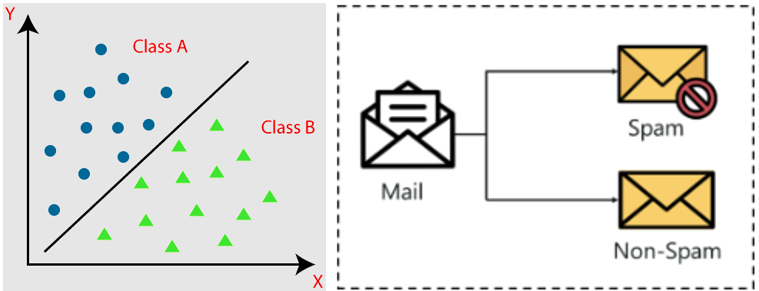

Classification is a predictive modelling problem in Machine Learning where a class Label is predicted for a given example of input data. In easier terms, it is basically classifying a given data or input set into a particular group, by using Statistical Principles. The spam detection algorithm of emails is a prime example of Classification.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST Data

## MNIST
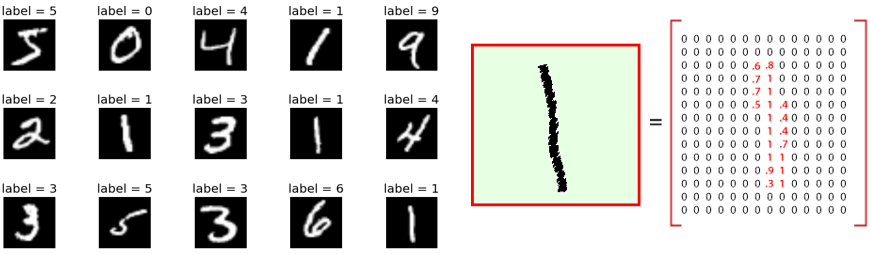

* MNIST is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. 
* Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning

### Loading the data
* Scikit-Learn provides many helper functions to download popular datasets. MNIST isone of them. 
* The following code fetches the MNIST dataset:
> fetch_openml("mnist_784", version=1)

In [ ]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784", version=1)

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per
feature
* A target key containing an array with the labels

In [ ]:
print(dataset['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
dataset['frame']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
X = dataset['data'].values
X.shape

(70000, 784)

In [ ]:
y = np.array(dataset['target'].values, dtype='int8')
y.shape

(70000,)

Label is  5


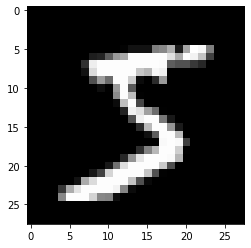

In [ ]:
img = X[0].reshape(28, 28)

print('Label is ', y[0])
plt.imshow(img, cmap='gray')
plt.show()

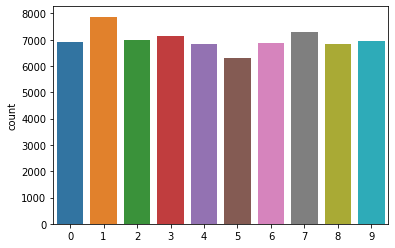

In [ ]:
sns.countplot(x=y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Training a Binary Classifier
* Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. 
* This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. 

In [ ]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

In [ ]:
pred = sgd_clf.predict(x_test)

True label  4
Predicted label  False


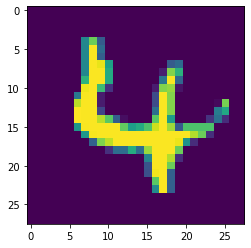

In [ ]:
i=8

img = x_test[i].reshape(28, 28)

print('True label ', y_test[i])
print('Predicted label ', pred[i])

plt.imshow(img)
plt.show()

https://tensorspace.org/html/playground/lenet.html

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5, pred)

0.9734285714285714

**Accuracy fails with Skewed data**

# Confusion Matric

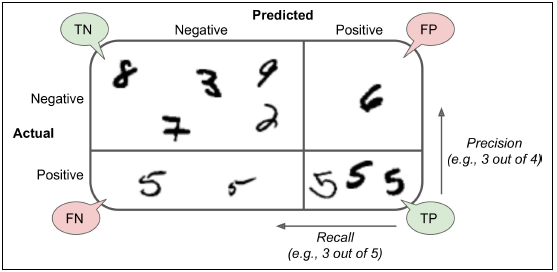

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_5, pred)

array([[19020,   158],
       [  400,  1422]])

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

* The first row of this matrix considers non-5 images (the negative
class): 8707 of them were correctly classified as non-5s (they are called **true negatives**), while the remaining 401 were wrongly classified as 5s (**false positives**).

* The second row considers the images of 5s (the positive class): 107 were wrongly classified as non-5s (**false negatives**), while the remaining 785 were correctly classified
as 5s (**true positives**). 

* A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

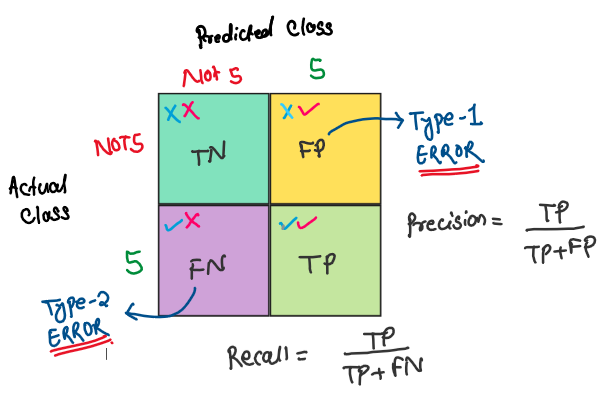

### **Precision**
Precision is also knoe as the accuracy of the positive predictions.
* Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model

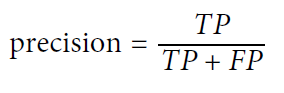

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test_5, pred)

0.9

### **Recall**
* Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. 
* Also known as **TPR(True Positive Rate)**: this is the ratio of positive instances that are correctly detected by the classifier

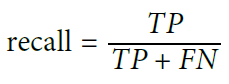

In [ ]:
recall_score(y_test_5, pred)

0.7804610318331504

## Precision/Recall Tradeoff

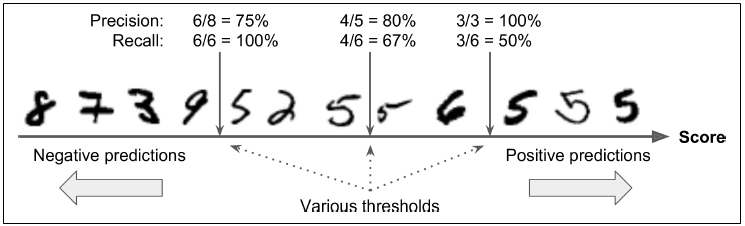

In [ ]:
# prediction in probability
y_scores = sgd_clf.decision_function(x_test)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)

In [ ]:
precisions.shape, recalls.shape, thresholds.shape

((19752,), (19752,), (19751,))

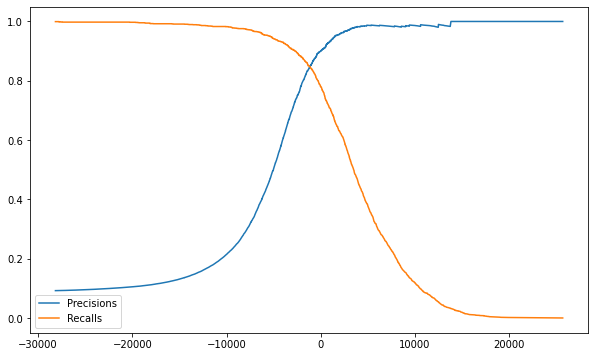

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[1:], label = 'Precisions')
plt.plot(thresholds, recalls[1:], label = 'Recalls')

plt.legend()
plt.show()

## **F1 - Score**
* It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. 
* The F1 score is the harmonic mean of precision and recall

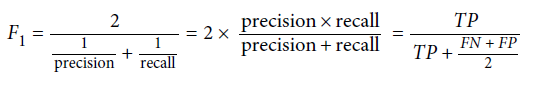

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_5, pred)

0.8359788359788359

## The ROC Curve

* The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
* It is very similar to the precision/recall curve, but instead of plotting
precision versus recall, the ROC curve plots the **true positive rate**(another name for **recall**) against the **false positive rate.**

* The **FPR is the ratio of negative instances that are incorrectly classified as positive**. 
* It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. 
* The TNR is also called **specificity**. 
* Hence the ROC curve plots **sensitivity** (recall) versus **1 – specificity**.

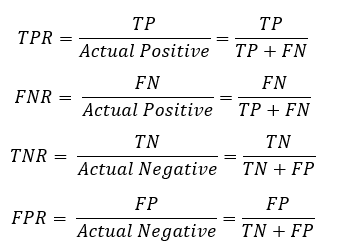


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test_5, y_scores)

In [ ]:
fpr.shape, tpr.shape, threshold.shape

((860,), (860,), (860,))

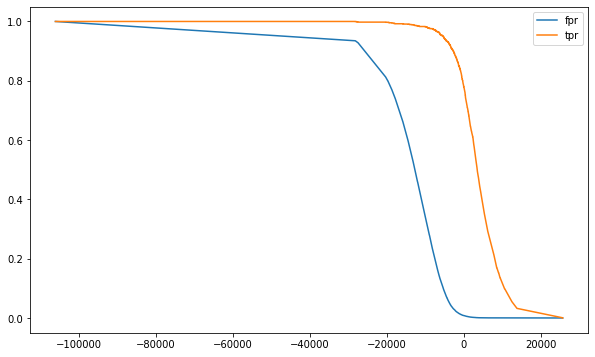

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(threshold, fpr, label = 'fpr')
plt.plot(threshold, tpr, label = 'tpr')

plt.legend()
plt.show()

No handles with labels found to put in legend.


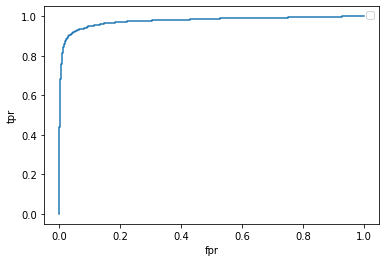

In [ ]:
# plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()
plt.show()

# Multiclass Classification

![image.jpg](https://i.stack.imgur.com/La40O.jpg)
* Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.
* Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. 
* Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.

* For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

* Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

3


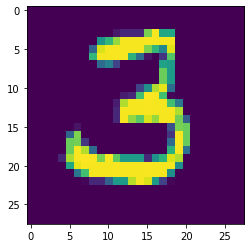

In [ ]:
img = x_test[7]

pred = ovo_clf.predict([img])
print(pred[0])

plt.imshow(img.reshape(28, 28))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

[3 3]
3


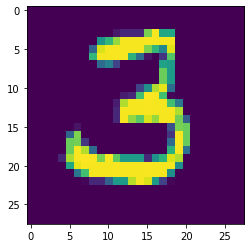

In [ ]:
img = x_test[7]

pred = forest.predict([img, img])
print(pred)
print(pred[0])

plt.imshow(img.reshape(28, 28))